<a href="https://colab.research.google.com/github/SohaibCodeBook/Deep-Learning-Algorithms/blob/main/ANN_tabular_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.19.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('sample_data/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X=data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

In [ ]:
Y=data['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
X['Geography']= encoder.fit_transform(X['Geography'])
X['Gender']= encoder.fit_transform(X['Gender'])

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [ ]:
X_train.shape

(8000, 10)

In [ ]:
X_test.shape

(2000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,ELU,PReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#Initializing the model

In [ ]:
classifier=Sequential()
#Adding first input layer
classifier.add(Dense(units=10,activation='relu'))

In [ ]:
#Adding First Hidden layer

In [ ]:
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
#Adding First Hidden layer

In [ ]:
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#Adding Output layer  //units=1 as we have categorical problem Yes or No and activation function for classfication problemm with be 'Sigmoid'

In [ ]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compiling Step of model

In [ ]:
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#fitting model

In [ ]:
early_stoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33, epochs=1000, batch_size=10, callbacks=early_stoping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5909 - loss: 0.6431 - val_accuracy: 0.8137 - val_loss: 0.4525
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8190 - loss: 0.4331 - val_accuracy: 0.8277 - val_loss: 0.4115
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8365 - loss: 0.3864 - val_accuracy: 0.8360 - val_loss: 0.3909
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8492 - loss: 0.3664 - val_accuracy: 0.8413 - val_loss: 0.3792
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8511 - loss: 0.3574 - val_accuracy: 0.8451 - val_loss: 0.3706
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8610 - loss: 0.3398 - val_accuracy: 0.8466 - val_loss: 0.3687
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8666 - loss: 0.3309 - val_accuracy: 0.8497 - val_loss: 0.3648
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8524 - loss: 0.3514 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

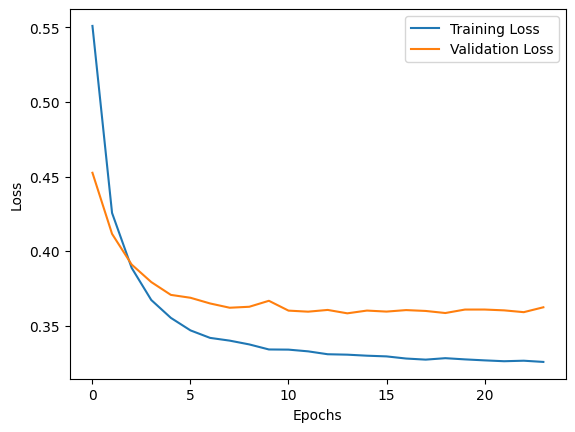

In [ ]:
import matplotlib.pyplot as plt

# Training vs validation loss
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


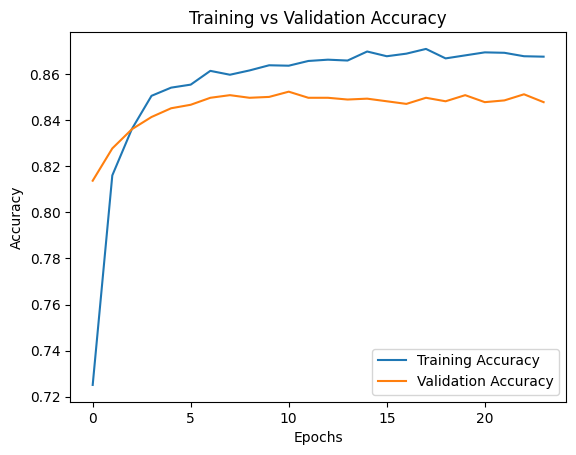

In [ ]:
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [ ]:
#Prediction and Evaluation of model

In [ ]:
Y_pred=classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
#from sklearn.metrics import accuracy_score
#acc=accuracy_score(Y_pred,Y_test)
#acc
acc=classifier.evaluate(X_test,Y_test)
acc

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8564 - loss: 0.3407


[0.3406173586845398, 0.8554999828338623]

In [ ]:
train_acc=classifier.evaluate(X_train,Y_train)
train_acc

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8691 - loss: 0.3270


[0.3354325592517853, 0.8621249794960022]